In [2]:
import pandas as pd

# Load data set

In [3]:
DATA_IN_PATH = './data_set/'

In [4]:
data = pd.read_csv(DATA_IN_PATH +'ChatbotData.csv', encoding='utf-8')

In [5]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [6]:
sentences = list(data['Q']) + list(data['A'])

In [7]:
sentences

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨',
 'SNS보면 나만 빼고 다 행복해보여',
 '가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '가스비 장난 아님',
 '가장 확실한 건 뭘까?',
 '가족 여행 가기로 했어',
 '가족 여행 고고',
 '가족 여행 어디로 가지?',
 '가족 있어?',
 '가족관계 알려 줘',
 '가족끼리 여행간다.',
 '가족들 보고 싶어',
 '가족들이랑 서먹해',
 '가족들이랑 서먹해졌어',
 '가족들이랑 어디 가지?',
 '가족들이랑 여행 갈거야',
 '가족여행 가야지',
 '가족이 누구야?',
 '가족이랑 여행 가려고',
 '가족한테 스트레스 풀었어',
 '가출할까?',
 '가출해도 갈 데가 없어',
 '간만에 떨리니까 좋더라',
 '간만에 쇼핑 중',
 '간만에 휴식 중',
 '간식 뭐 먹을까',
 '간식 추천',
 '간장치킨 시켜야지',
 '간접흡연 싫어',
 '갈까 말까 고민 돼',
 '갈까 말까?',
 '감 말랭이 먹고 싶다.',
 '감 말랭이 먹어야지',
 '감기 같애',
 '감기 걸린 것 같아',
 '감기 기운이 있어',
 '감기 들 거 같애',
 '감기가 오려나',
 '감기약이 없어',
 '감기인거 같애',
 '감미로운 목소리 좋아',
 '감정이 쓰레기통처럼 엉망진창이야',
 '감정컨트롤을 못하겠어',
 '감정컨트롤이 안돼',
 '감히 나를 무시하는 애가 있어',
 '갑자기 나쁜 생각이 막 들더라',
 '갑자기 눈물 나',

In [8]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

In [10]:
len(sent_len_by_token)

23646

In [11]:
len(sent_len_by_eumjeol)

23646

# Data EDA

In [13]:
from konlpy.tag import Okt

In [14]:
okt = Okt()

In [15]:
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]

In [16]:
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [18]:
len(sent_len_by_morph)

23646

In [19]:
import matplotlib.pyplot as plt

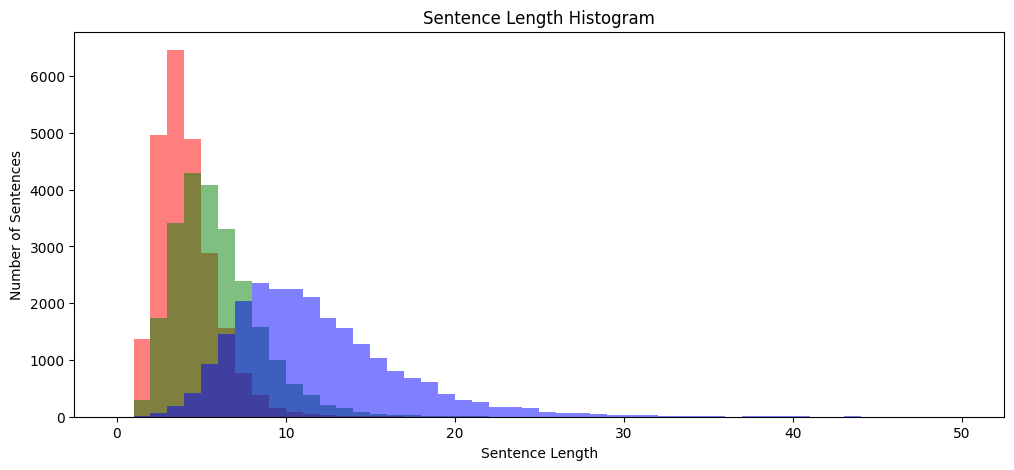

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

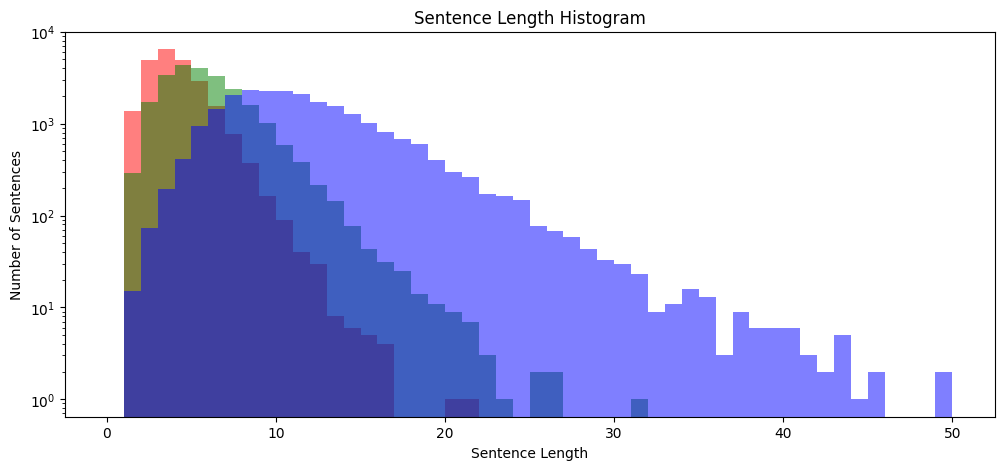

In [21]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

In [22]:
import numpy as np

In [23]:
print('어절 최대 길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이: {}'.format(np.median(sent_len_by_token)))
print('제1사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제3사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이: 21
어절 최소 길이: 1
어절 평균 길이: 3.64
어절 길이 표준편차: 1.74
어절 중간 길이: 3.0
제1사분위 길이: 2.0
제3사분위 길이: 5.0


In [24]:
print('형태소 최대 길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소 길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균 길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이: {}'.format(np.median(sent_len_by_morph)))
print('제1사분위 형태소 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제3사분위 형태소 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대 길이: 31
형태소 최소 길이: 1
형태소 평균 길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간 길이: 5.0
제1사분위 형태소 길이: 4.0
제3사분위 형태소 길이: 7.0


In [25]:
print('음절 최대 길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소 길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균 길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간 길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('제1사분위 음절 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('제3사분위 음절 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대 길이: 57
음절 최소 길이: 1
음절 평균 길이: 11.31
음절 길이 표준편차: 4.98
음절 중간 길이: 10.0
제1사분위 음절 길이: 8.0
제3사분위 음절 길이: 14.0


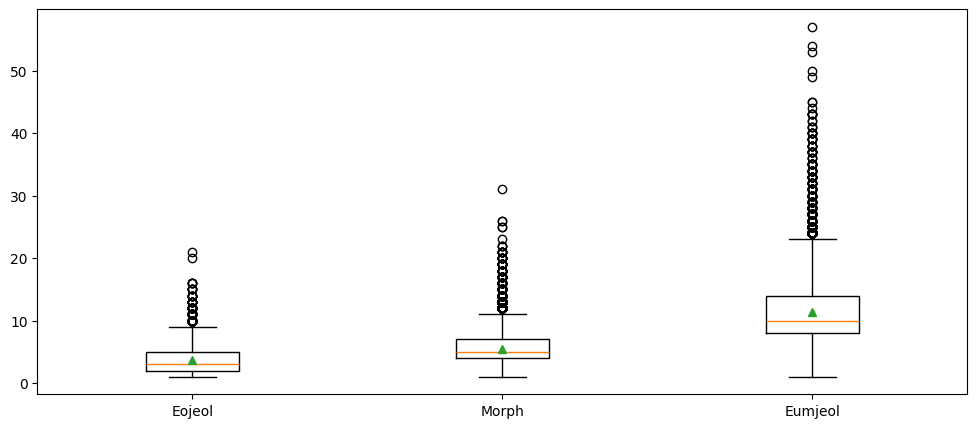

In [27]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            tick_labels=['Eojeol', 'Morph', 'Eumjeol'],
            showmeans=True)
plt.show()

In [28]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

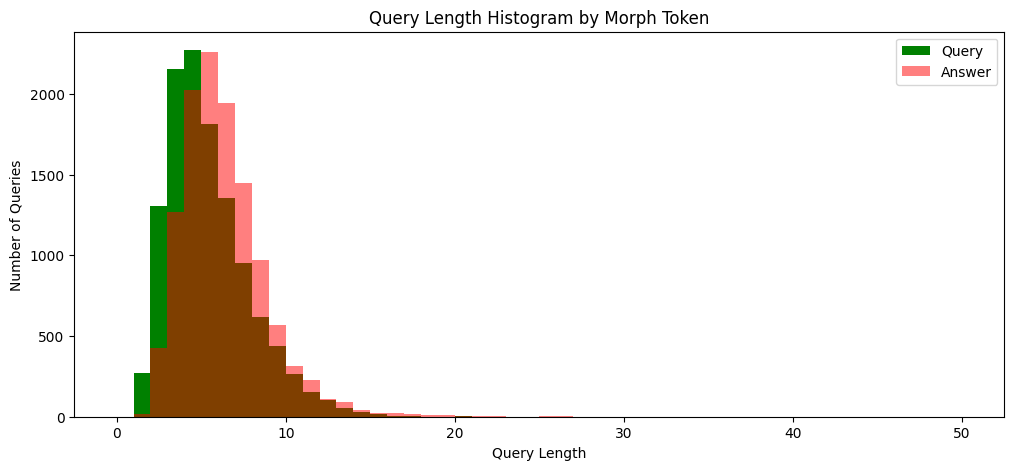

In [31]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')
plt.show()

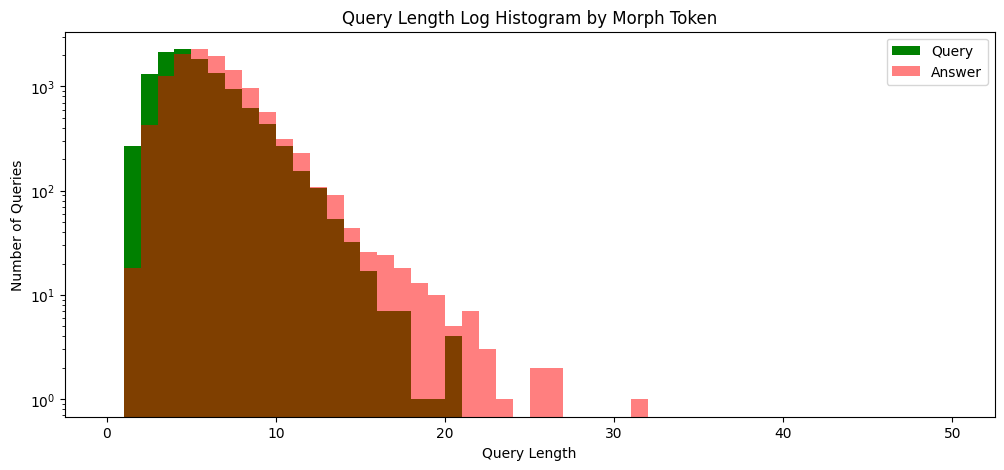

In [32]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')
plt.show()

In [33]:
print('질문 형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('질문 형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('질문 형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('질문 형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('질문 형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('질문 형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('질문 형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

질문 형태소 최대길이: 20
질문 형태소 최소길이: 1
질문 형태소 평균길이: 4.95
질문 형태소 길이 표준편차: 2.48
질문 형태소 중간길이: 4.0
질문 형태소 1/4 퍼센타일 길이: 3.0
질문 형태소 3/4 퍼센타일 길이: 6.0


In [34]:
print('대답 형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('대답 형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('대답 형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('대답 형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('대답 형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('대답 형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('대답 형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

대답 형태소 최대길이: 31
대답 형태소 최소길이: 1
대답 형태소 평균길이: 5.87
대답 형태소 길이 표준편차: 2.55
대답 형태소 중간길이: 5.0
대답 형태소 1/4 퍼센타일 길이: 4.0
대답 형태소 3/4 퍼센타일 길이: 7.0


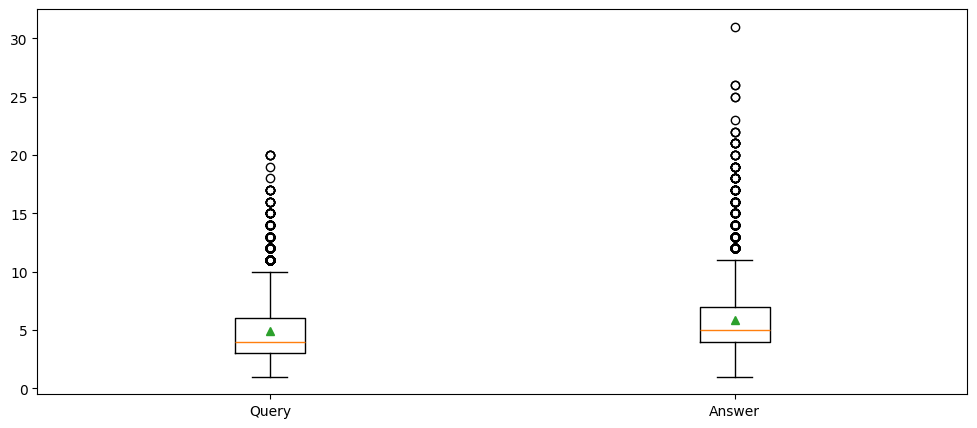

In [35]:
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
            tick_labels=['Query', 'Answer'],
            showmeans=True)
plt.show()

In [36]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [37]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

In [38]:
for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

In [39]:
from wordcloud import WordCloud

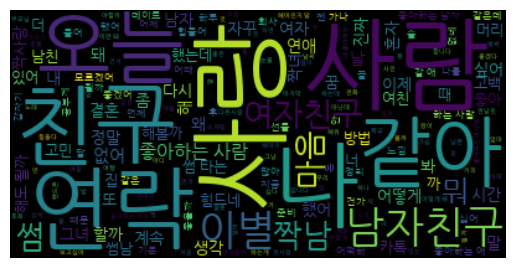

In [40]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

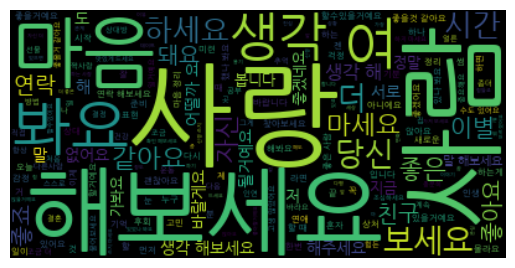

In [41]:
answer_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()